In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

***READING THE DATASET***

In [2]:
df = pd.read_csv("winemag-data-130k-v2.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [4]:
df.shape

(129971, 14)

In [5]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [6]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [7]:
# Fill missing numeric values with the mean
df['price'].fillna(df['price'].mean(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_19312\1183827928.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].mean(), inplace=True)


In [8]:
df["country"].value_counts()

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


In [9]:
## Filling the missing value of country column
most_frequent_country = df['country'].mode()[0]
df['country'].fillna(most_frequent_country, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_19312\2335537089.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(most_frequent_country, inplace=True)


In [10]:
df['province'].value_counts()

province
California        36247
Washington         8639
Bordeaux           5941
Tuscany            5897
Oregon             5373
                  ...  
Messinia              1
Markopoulo            1
Paardeberg            1
Krania Olympus        1
Neuchâtel             1
Name: count, Length: 425, dtype: int64

In [11]:
## Filling the missing value of province column
most_frequent_province = df['province'].mode()[0]
df['province'].fillna(most_frequent_province, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_19312\3061746193.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['province'].fillna(most_frequent_province, inplace=True)


In [12]:
df.isnull().sum()

Unnamed: 0                   0
country                      0
description                  0
designation              37465
points                       0
price                        0
province                     0
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [13]:
## Filling the missing value of variety column
most_frequent_variety = df['variety'].mode()[0]
df['variety'].fillna(most_frequent_variety, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_19312\2668176016.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['variety'].fillna(most_frequent_variety, inplace=True)


In [14]:
df.isnull().sum()

Unnamed: 0                   0
country                      0
description                  0
designation              37465
points                       0
price                        0
province                     0
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      0
winery                       0
dtype: int64

In [15]:
new_df=df[['country','description','points','price','province','title','variety','winery']]

In [16]:
new_df.isnull().sum()

country        0
description    0
points         0
price          0
province       0
title          0
variety        0
winery         0
dtype: int64

In [17]:
new_df["variety"].value_counts()

variety
Pinot Noir                    13273
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Cabernet Sauvignon-Barbera        1
Sauvignonasse                     1
Forcallà                          1
Meseguera                         1
Bobal-Cabernet Sauvignon          1
Name: count, Length: 707, dtype: int64

In [18]:
# check for duplicated rows
sum(new_df.duplicated())

9983

In [19]:
new_df.drop_duplicates(inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_19312\2373844780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop_duplicates(inplace=True)


In [20]:
new_df.duplicated().sum()# No more duplicate values in this dataset

0

In [21]:
new_df.shape

(119988, 8)

In [22]:
wines=new_df.copy()

In [23]:
new_df.head()

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,35.363389,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.000000,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.000000,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.000000,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.000000,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


***Exploratory data analysis***

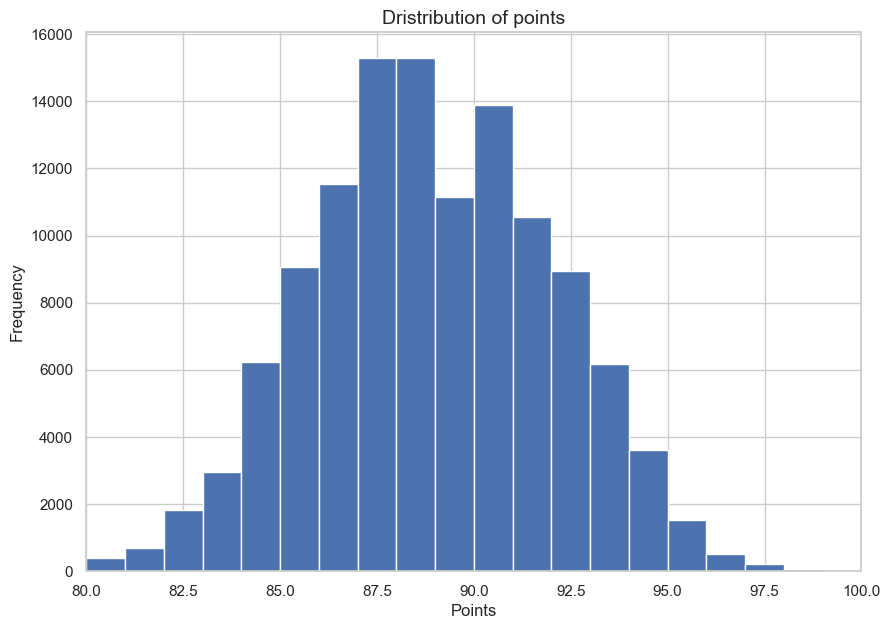

In [24]:
plt.figure(figsize=(10, 7))
plt.hist(data=wines, x='points', bins=np.arange (80, wines['points'].max()+1, 1))
plt.xlim(80,100)
plt.title('Dristribution of points', fontsize=14)
plt.xlabel('Points')
plt.ylabel('Frequency');

In [25]:
# top 10 wine producing
country_top_10 = wines["country"].value_counts()[:10]
country_top_10

country
US           50516
France       20353
Italy        17940
Spain         6116
Portugal      5256
Chile         4184
Argentina     3544
Austria       3034
Australia     2197
Germany       1992
Name: count, dtype: int64

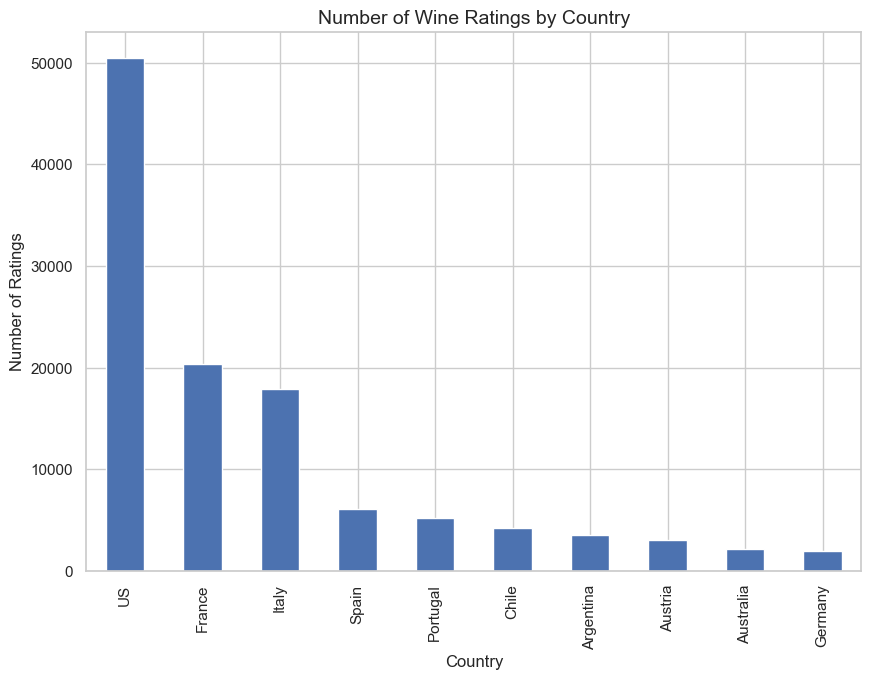

In [26]:
plt.figure(figsize=(10, 7))
country_top_10.plot(kind='bar')
plt.title('Number of Wine Ratings by Country', fontsize = 14)
plt.xlabel('Country')
plt.ylabel('Number of Ratings');

In [27]:
# top 10 countries with most average points
best_quality = wines.groupby("country")["points"].mean().reset_index()  
best_quality = best_quality.sort_values(by="points", ascending=False)[:10] 
best_quality.style.background_gradient(cmap='Greens', high=0.5, subset=["points"])


,country,points
14,England,91.746032
20,India,90.250000
3,Austria,90.129532
17,Germany,89.895582
7,Canada,89.309735
19,Hungary,89.294574
9,China,89.000000
15,France,88.866752
24,Luxembourg,88.800000
28,Morocco,88.708333


C:\Users\hp\AppData\Local\Temp\ipykernel_19312\2034967902.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=sns.light_palette("green", reverse=True, n_colors=10))


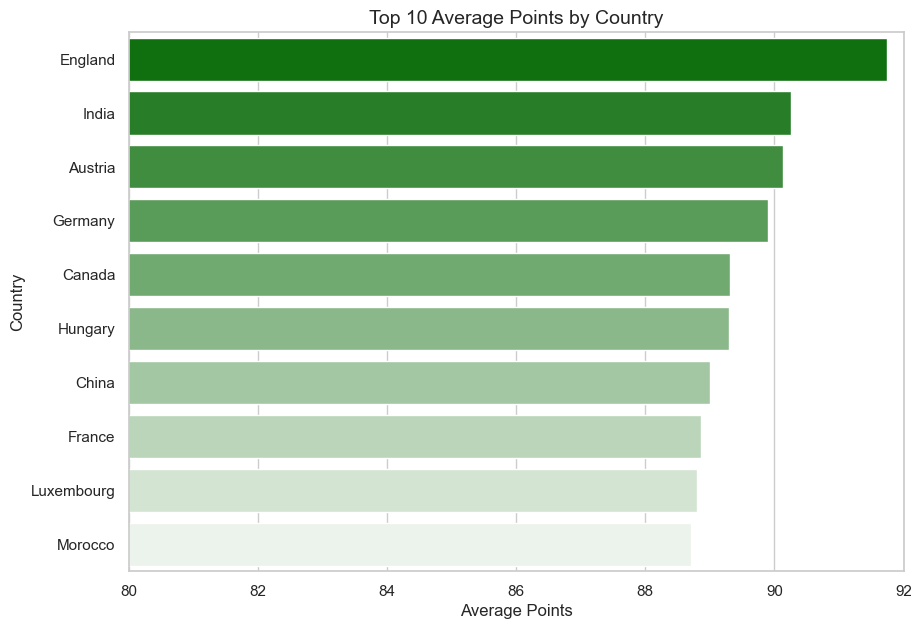

In [28]:
y = best_quality["country"]  
x = best_quality["points"]

plt.figure(figsize=(10, 7))
plt.xlim(80, 92)

sns.barplot(x=x, y=y, palette=sns.light_palette("green", reverse=True, n_colors=10))

plt.title('Top 10 Average Points by Country', fontsize=14)
plt.xlabel('Average Points')
plt.ylabel('Country')

plt.show()  

In [29]:
wines["points"].describe()

count    119988.000000
mean         88.442236
std           3.092915
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [30]:
# let's look at those with scores over 95
high_scores = wines.drop(["description", "price", "province", "winery"], axis=1)
high_scores = high_scores[high_scores["points"] >= 95][:20]
high_scores.style.background_gradient(cmap='Greens',high=0.5, subset=["points"])

,country,points,title,variety
345,Australia,100,Chambers Rosewood Vineyards NV Rare Muscat (Rutherglen),Muscat
346,Australia,98,Chambers Rosewood Vineyards NV Rare Muscadelle (Rutherglen),Muscadelle
347,Germany,97,Robert Weil 2014 Kiedrich Gräfenberg Trockenbeerenauslese Riesling (Rheingau),Riesling
348,Australia,97,Chambers Rosewood Vineyards NV Grand Muscat (Rutherglen),Muscat
349,Australia,97,Torbreck 2012 RunRig Shiraz-Viognier (Barossa),Shiraz-Viognier
350,Italy,97,Cavallotto 2010 Vignolo Riserva (Barolo),Nebbiolo
351,Hungary,96,Oremus 2005 Eszencia (Tokaji),Furmint
352,US,96,Rochioli 2014 South River Chardonnay (Russian River Valley),Chardonnay
353,France,96,Louis Latour 2014 Le Montrachet (Montrachet),Chardonnay
354,Germany,96,Robert Weil 2014 Kiedrich Gräfenberg Beerenauslese Riesling (Rheingau),Riesling


In [31]:
# number of wines from each country scoring the highest ratings of 95-100 points
high_scores["country"].value_counts()

country
Australia    6
US           4
France       4
Germany      3
Italy        2
Hungary      1
Name: count, dtype: int64

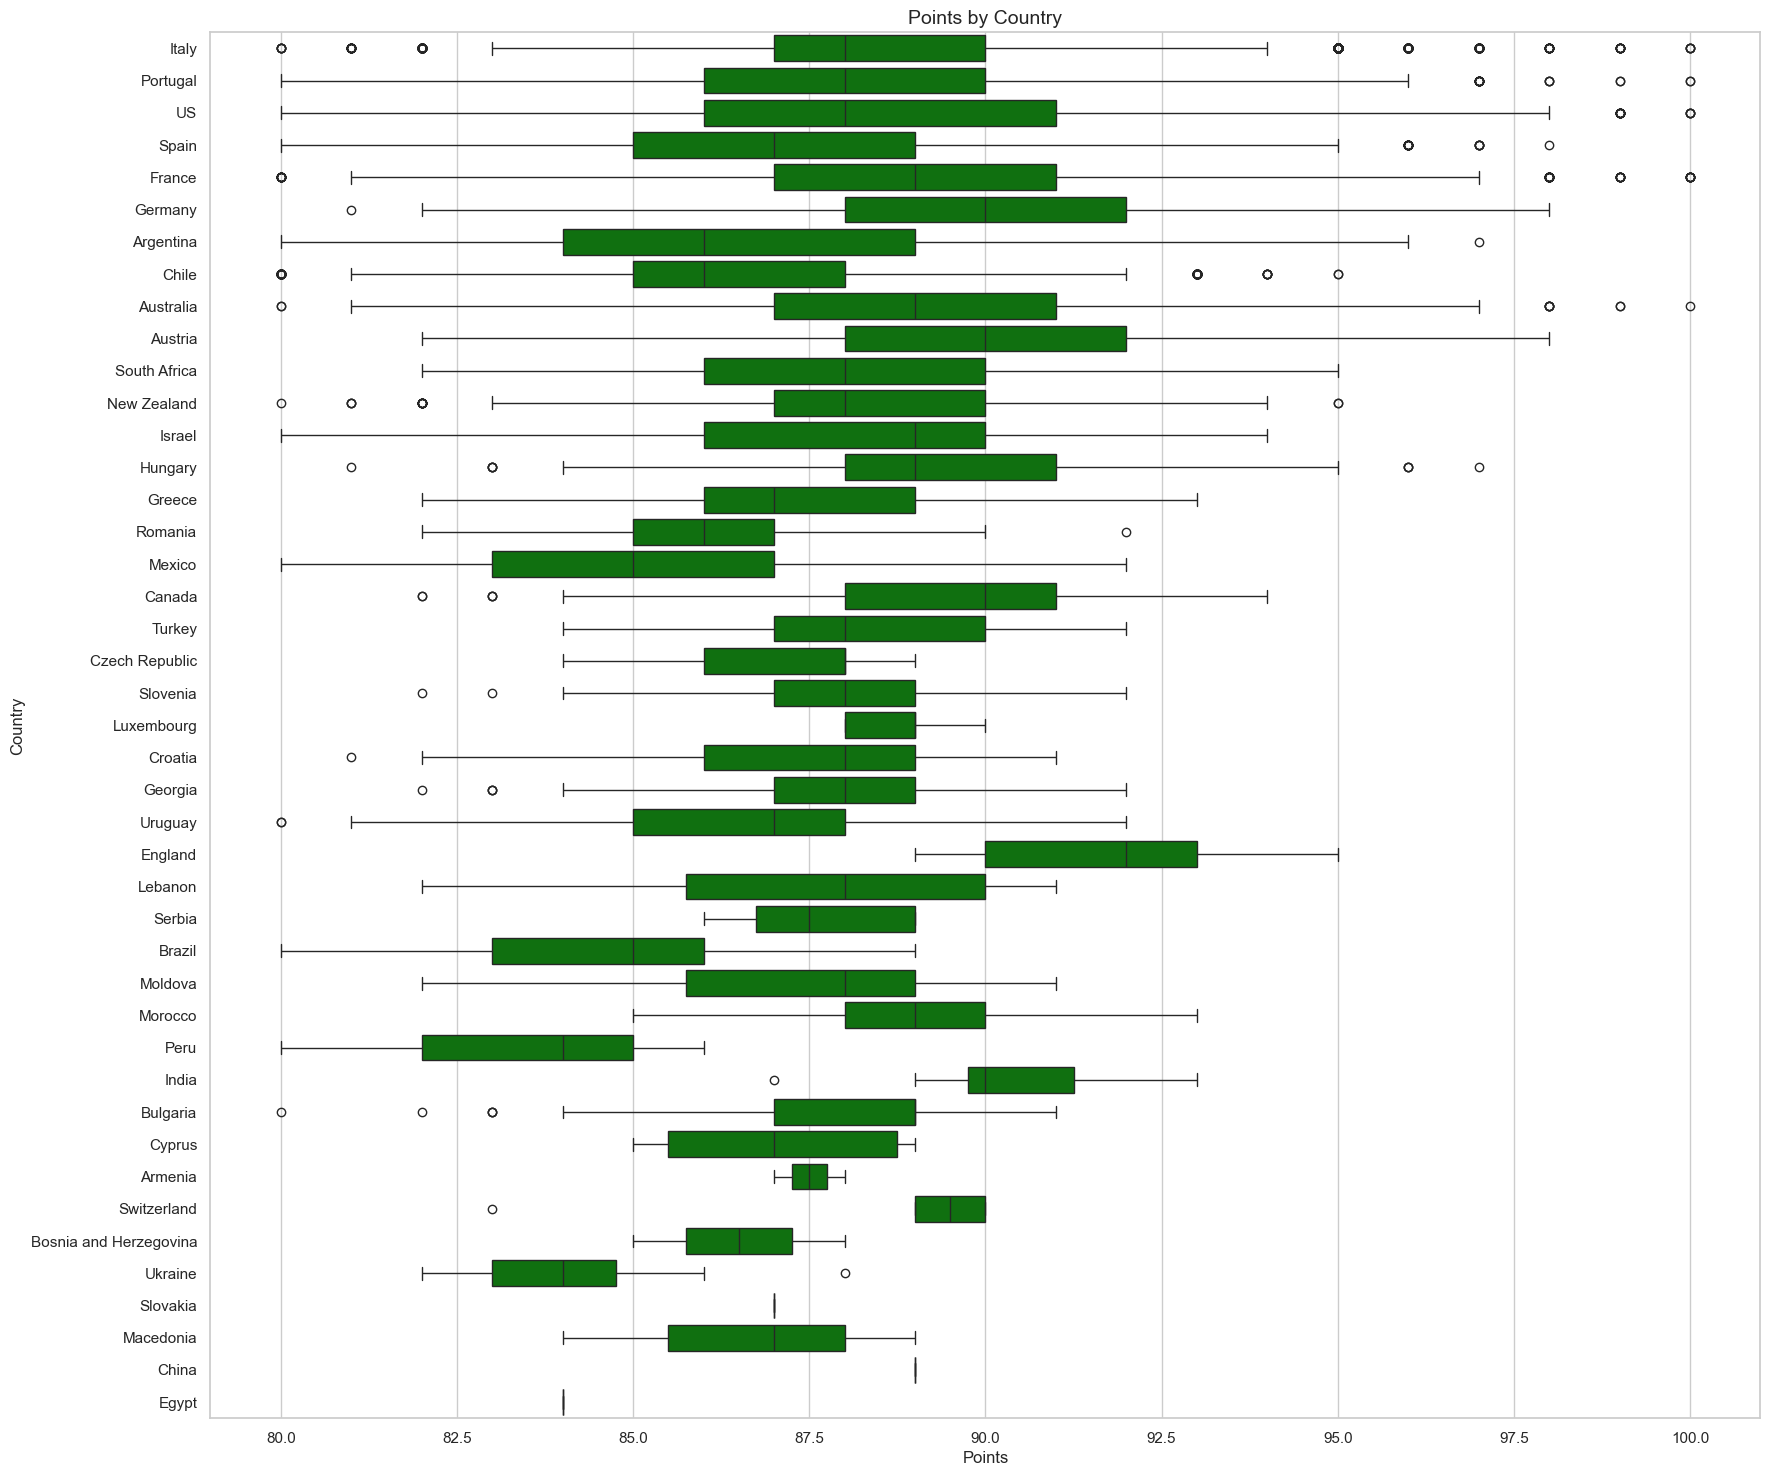

In [32]:
plt.figure(figsize=(20, 18))
sns.boxplot(data=wines, x='points', y='country', color = 'green')
plt.title('Points by Country', fontsize = 14)
plt.xlabel('Points')
plt.ylabel('Country');

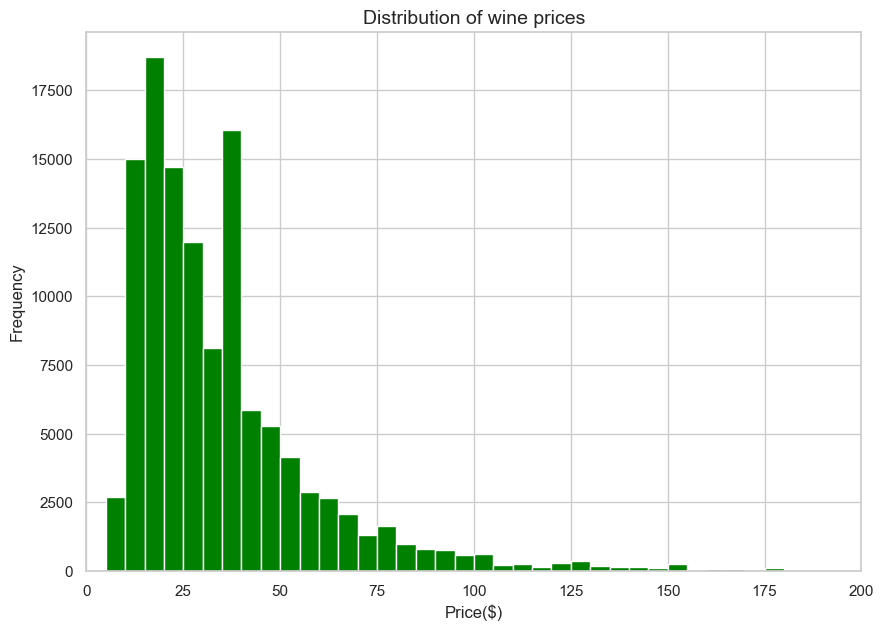

In [33]:

plt.figure(figsize=(10, 7))
bins = np.arange (0, wines["price"].max()+5, 5)
plt.hist(data=wines, x='price', bins=bins, color = 'green')
plt.xlim(0,200)
plt.title('Distribution of wine prices', fontsize=14)
plt.xlabel('Price($)')
plt.ylabel('Frequency');

In [34]:
wines["price"].describe()


count    119988.000000
mean         35.602741
std          40.604162
min           4.000000
25%          18.000000
50%          28.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64

In [35]:
np.log10(wines["price"].describe())

count    5.079138
mean     1.551483
std      1.608571
min      0.602060
25%      1.255273
50%      1.447158
75%      1.602060
max      3.518514
Name: price, dtype: float64

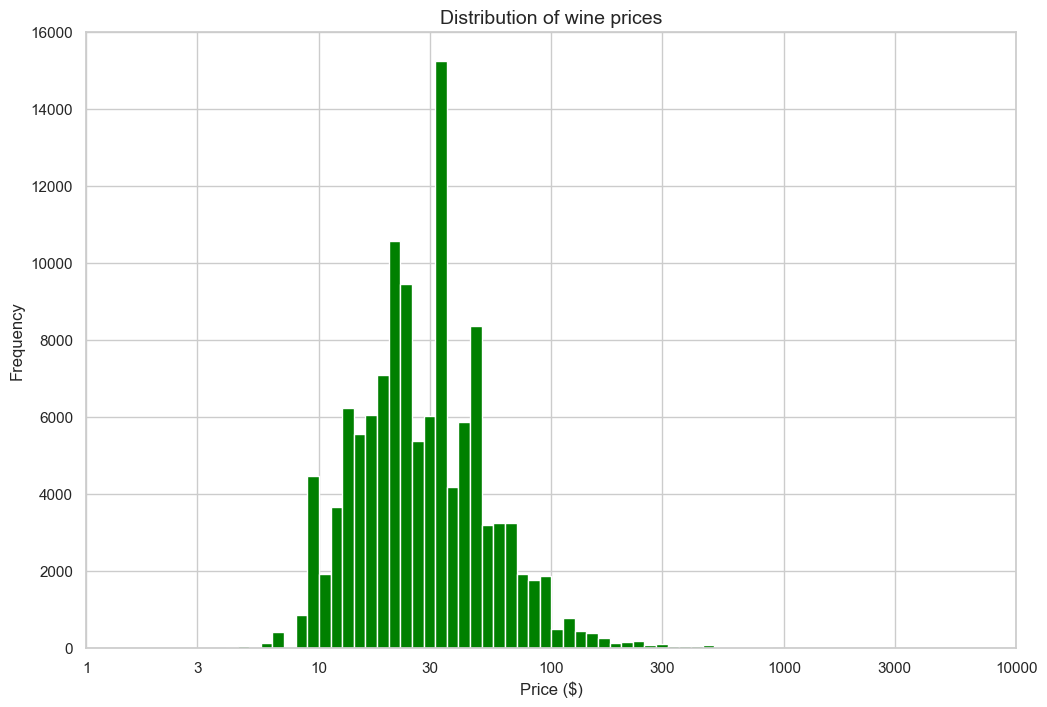

In [36]:
# price distribution on a log scale
plt.figure(figsize=(12, 8))
bins = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data=wines, x='price', bins=bins, color='green')
plt.title('Distribution of wine prices', fontsize=14)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Price ($)')
plt.ylabel('Frequency');

C:\Users\hp\AppData\Local\Temp\ipykernel_19312\4288131894.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=sns.light_palette("green", reverse=True, n_colors=len(average_price)))


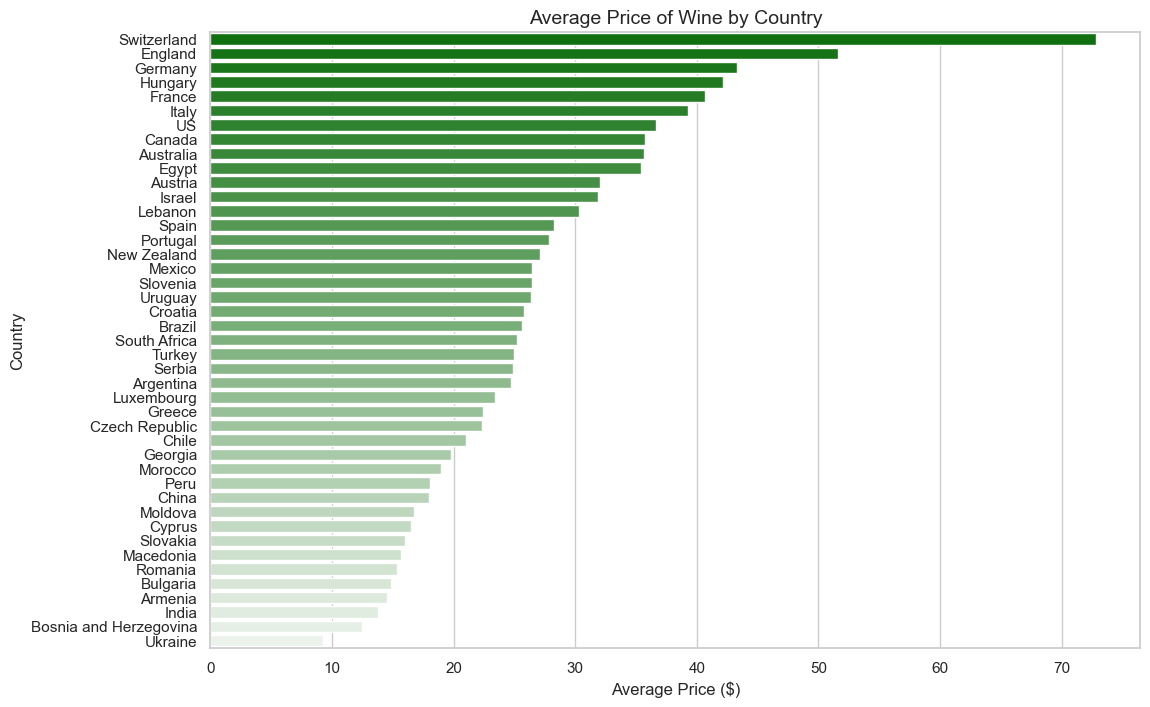

In [37]:
average_price = wines.groupby("country")["price"].mean().reset_index()
average_price = average_price.sort_values(by="price", ascending=False)

y = average_price["country"]  
x = average_price["price"]    

plt.figure(figsize=(12, 8))

sns.barplot(x=x, y=y, palette=sns.light_palette("green", reverse=True, n_colors=len(average_price)))

plt.title('Average Price of Wine by Country', fontsize=14)
plt.xlabel('Average Price ($)')
plt.ylabel('Country')

plt.show()  


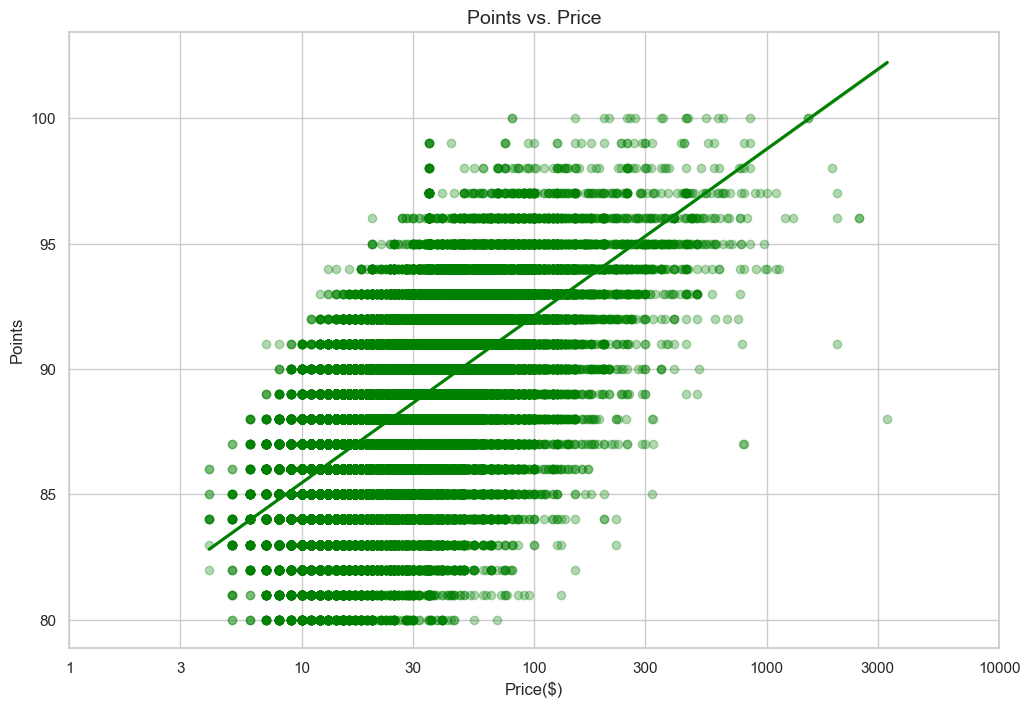

In [38]:
# relationship between points and price

x = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]

plt.figure(figsize=(12, 8))
sns.regplot(x='price', y='points', data=wines, color='green', logx=True, scatter_kws={'alpha':0.3})
plt.title("Points vs. Price", fontsize=14)
plt.xscale('log')
plt.xticks(x, x)
plt.xlabel("Price($)")
plt.ylabel("Points");

**The scatterplot shows a positive relationship between points and price, with more expensive wines, tend to receive better ratings.**

In [39]:
wines[wines["price"] == wines["price"].min()][:1]

,country,description,points,price,province,title,variety,winery
1987,Spain,Berry and cherry aromas are surprisingly sturd...,85,4.0,Central Spain,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis


In [40]:
wines[wines["price"] == wines["price"].max()][:1]

,country,description,points,price,province,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


In [41]:
wines["variety"].value_counts()[:20]

variety
Pinot Noir                  12279
Chardonnay                  10868
Cabernet Sauvignon           8840
Red Blend                    8243
Bordeaux-style Red Blend     6471
Riesling                     4773
Sauvignon Blanc              4575
Syrah                        3828
Rosé                         3220
Merlot                       2896
Nebbiolo                     2607
Zinfandel                    2530
Sangiovese                   2462
Malbec                       2446
Portuguese Red               2282
White Blend                  2179
Sparkling Blend              1971
Tempranillo                  1671
Rhône-style Red Blend        1343
Pinot Gris                   1324
Name: count, dtype: int64

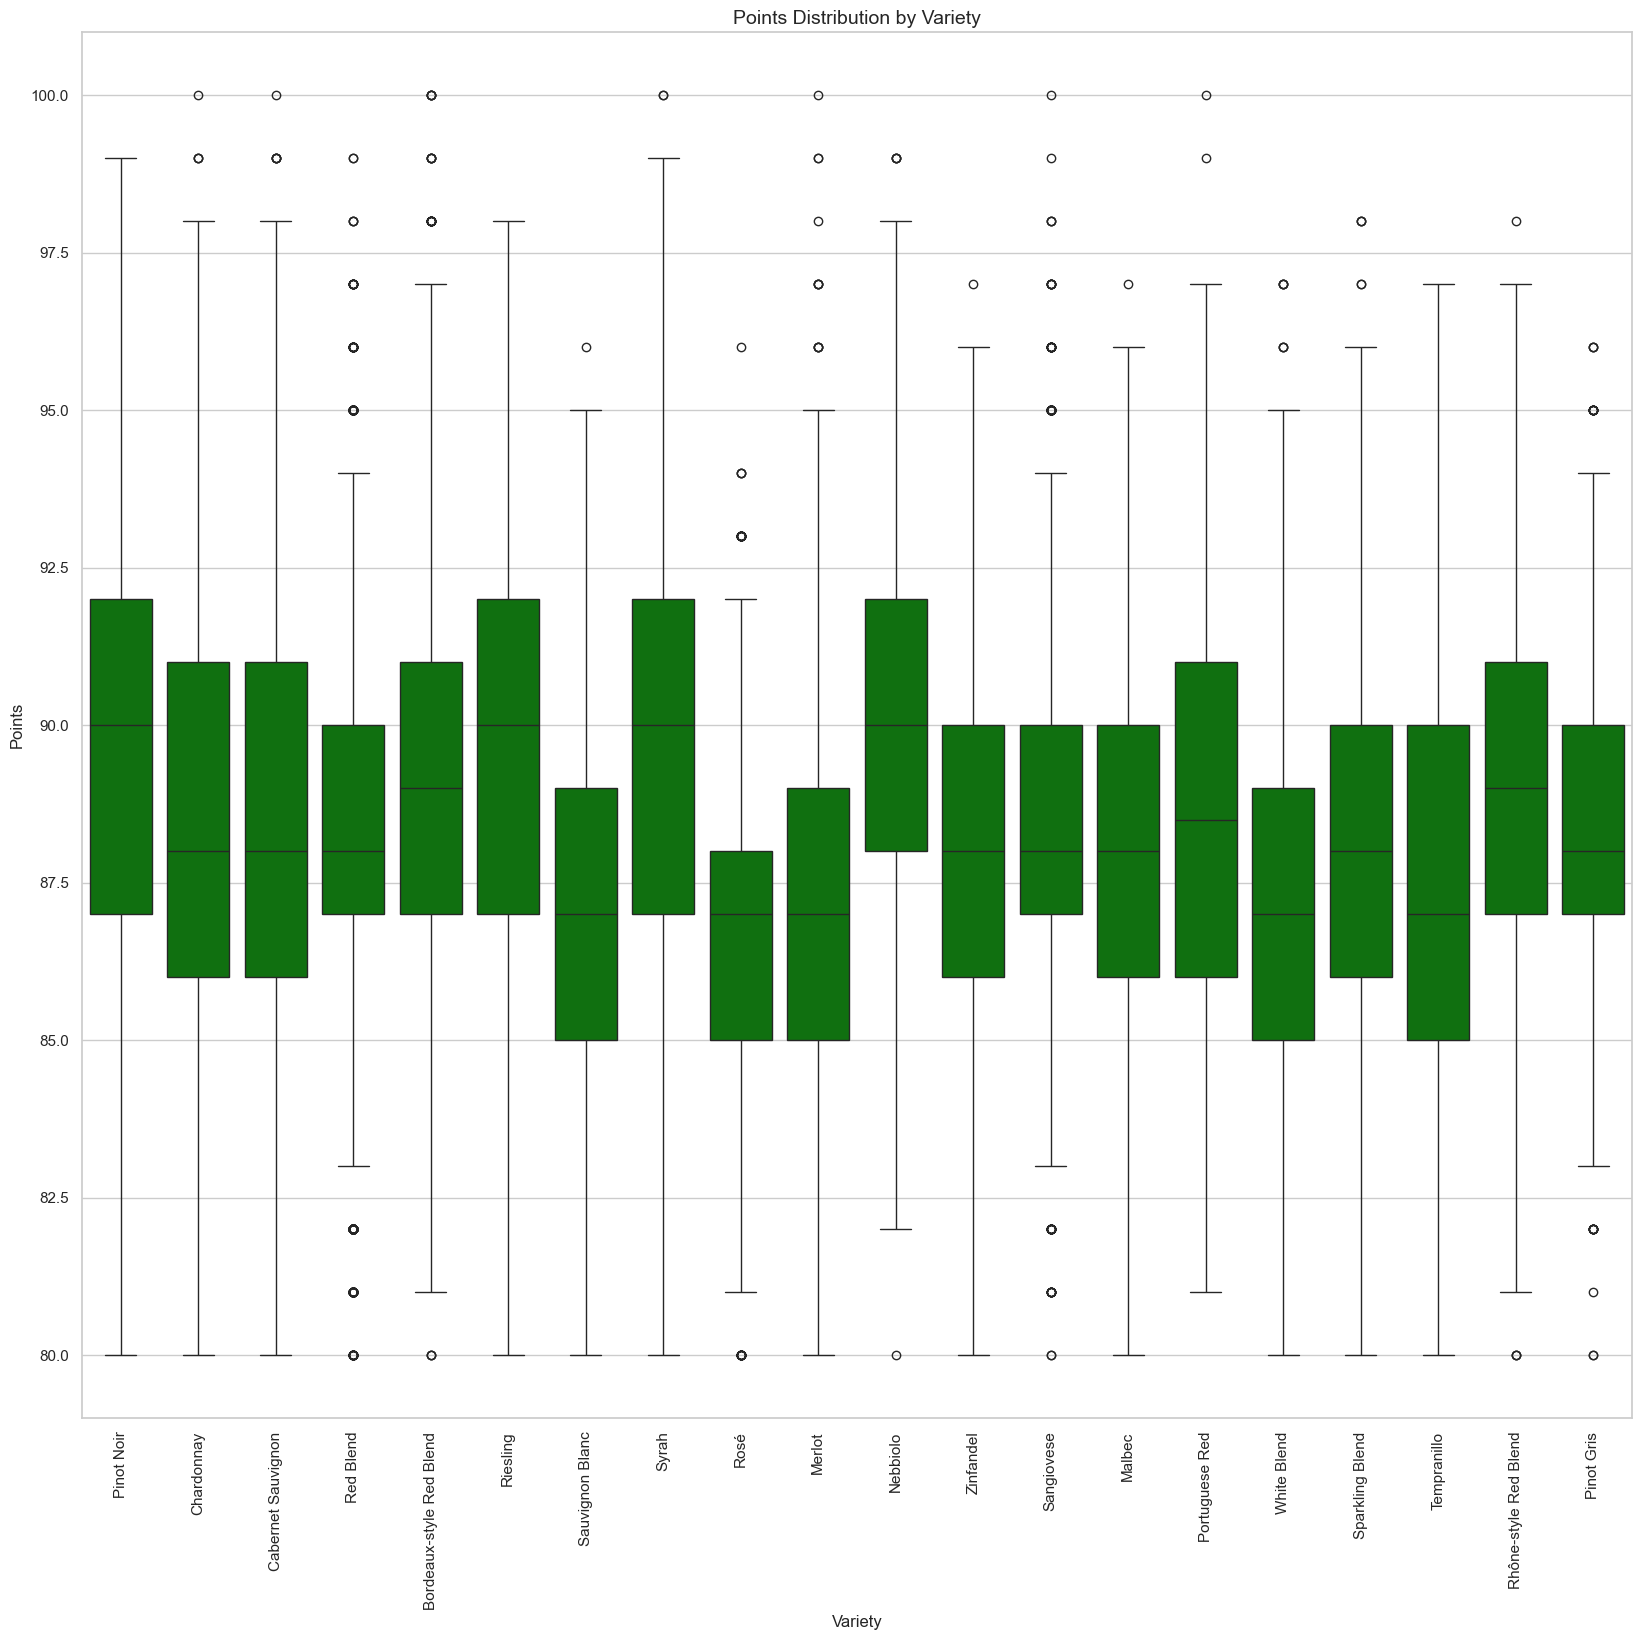

In [42]:
# top 20 most frequent wines by points scored
plt.figure(figsize=(20, 18))
sns.boxplot(data=wines,
            x='variety',
            y='points',
            color="green",
            order=wines["variety"].value_counts().iloc[:20].index)

plt.title('Points Distribution by Variety', fontsize = 14)
plt.xlabel('Variety')
plt.ylabel('Points')
plt.xticks(rotation=90);

In [43]:
# top 10 under $15 
under_15 = wines.drop(["description", "province", "winery"], axis=1)
under_15 = under_15[under_15["price"] <= 15]
under_15 = under_15.sort_values(by="points", ascending=False)[:10]
under_15.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,country,points,price,title,variety
19136,Spain,94,14.000000,Osborne NV Pedro Ximenez 1827 Sweet Sherry Sherry (Jerez),Sherry
23974,Portugal,94,13.000000,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red
68720,France,93,12.000000,Château d'Aydie 2010 Aydie l'Origine Tannat-Cabernet Franc (Madiran),Tannat-Cabernet Franc
52776,US,93,14.000000,Uvaggio 2009 Vermentino (Lodi),Vermentino
22871,Portugal,93,13.000000,Aveleda 2012 Follies Casa da Agueira Touriga Nacional (Bairrada),Touriga Nacional
88440,Austria,93,14.000000,Gunter Triebaumer 2015 Furmint (Burgenland),Furmint
54940,France,93,15.000000,Château d'Aydie 2013 Laplace Tannat (Madiran),Tannat
37882,Australia,93,15.000000,Marquis Philips 2000 Sarah's Blend Red (South Eastern Australia),Red Blend
12255,South Africa,93,15.000000,Simonsig 1998 Cabernet Sauvignon (Stellenbosch),Cabernet Sauvignon
111256,US,93,15.000000,Terre Rouge 2008 Muscat a Petits Grains Vin Doux Naturel Muscat (Shenandoah Valley (CA)),Muscat


In [44]:
# top 10 between $15 and $30
between_15_and_30 = wines.drop(["description", "province", "winery"], axis=1)
between_15_and_30 = between_15_and_30.query("price > 15 and price <= 30")
between_15_and_30 = between_15_and_30.sort_values(by="points", ascending=False)[:10]
between_15_and_30.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,country,points,price,title,variety
54253,US,96,27.000000,Donkey & Goat 2012 Grenache Noir Grenache (El Dorado),Grenache
40309,Italy,96,27.000000,Isole e Olena 2010 Chianti Classico,Red Blend
81902,US,96,30.000000,Efeste 2009 Lola Chardonnay (Columbia Valley (WA)),Chardonnay
54311,Austria,96,28.000000,Eichinger 2014 Gaisberg Reserve Riesling (Kamptal),Riesling
109845,US,96,30.000000,Sineann 2015 TFL Pinot Noir (Willamette Valley),Pinot Noir
101580,US,96,20.000000,Rulo 2007 Syrah (Columbia Valley (WA)),Syrah
119658,Spain,96,30.000000,Alvear NV Solera 1927 Pedro Ximénez (Montilla-Moriles),Pedro Ximénez
45992,France,96,28.000000,Château Filhot 2014 Sauternes,Bordeaux-style White Blend
9901,France,96,29.000000,Domaines Schlumberger 2014 Saering Grand Cru Riesling (Alsace),Riesling
102489,US,96,27.000000,The Eyrie Vineyards 2014 Estate Chardonnay (Dundee Hills),Chardonnay


In [45]:
# top 10 between $30 and $50
between_30_and_50 = wines.drop(["description", "province", "winery"], axis=1)
between_30_and_50 = between_30_and_50.query("price > 30 and price <= 50")
between_30_and_50 = between_30_and_50.sort_values(by="points", ascending=False)[:10]
between_30_and_50.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,country,points,price,title,variety
116095,France,99,35.363389,Château Pontet-Canet 2009 Barrel sample (Pauillac),Bordeaux-style Red Blend
116094,France,99,35.363389,Château Palmer 2009 Barrel sample (Margaux),Bordeaux-style Red Blend
118059,US,99,44.000000,Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast),Chardonnay
111758,France,99,35.363389,Château Latour 2010 Pauillac,Bordeaux-style Red Blend
116093,France,99,35.363389,Château d'Yquem 2009 Barrel sample (Sauternes),Bordeaux-style White Blend
111757,France,99,35.363389,Château Ausone 2010 Saint-Émilion,Bordeaux-style Red Blend
116096,France,98,35.363389,Château Climens 2009 Barrel sample (Barsac),Bordeaux-style White Blend
111762,France,98,35.363389,Château Mouton Rothschild 2010 Pauillac,Bordeaux-style Red Blend
48895,France,98,35.363389,Domaine des Lambrays 2005 Clos de Lambrays,Pinot Noir
109406,Austria,98,35.363389,Kracher 2008 Zwischen den Seen Nummer 9 Trockenbeerenauslese Welschriesling (Burgenland),Welschriesling


In [46]:
# top 10 above $50
above_50 = wines.drop(["description", "province", "winery"], axis=1)
above_50 = above_50.query("price > 50")
above_50 = above_50.sort_values(by="points", ascending=False)[:10]
above_50.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,country,points,price,title,variety
42197,Portugal,100,450.000000,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red
36528,France,100,259.000000,Krug 2002 Brut (Champagne),Champagne Blend
123545,US,100,80.000000,Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA)),Syrah
45781,Italy,100,550.000000,Biondi Santi 2010 Riserva (Brunello di Montalcino),Sangiovese
113929,US,100,80.000000,Charles Smith 2006 Royal City Syrah (Columbia Valley (WA)),Syrah
118058,US,100,450.000000,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend
39286,Italy,100,460.000000,Tenuta dell'Ornellaia 2007 Masseto Merlot (Toscana),Merlot
7335,Italy,100,210.000000,Avignonesi 1995 Occhio di Pernice (Vin Santo di Montepulciano),Prugnolo Gentile
45798,US,100,200.000000,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon
345,Australia,100,350.000000,Chambers Rosewood Vineyards NV Rare Muscat (Rutherglen),Muscat


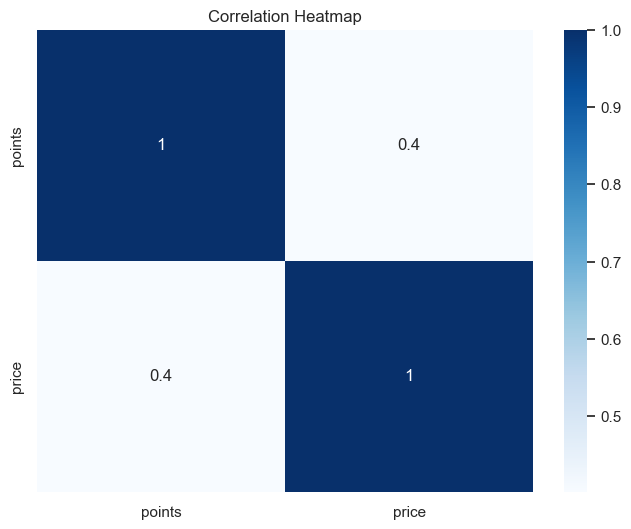

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['points', 'price']].corr(), annot=True, cmap='Blues')  
plt.title('Correlation Heatmap')
plt.show()



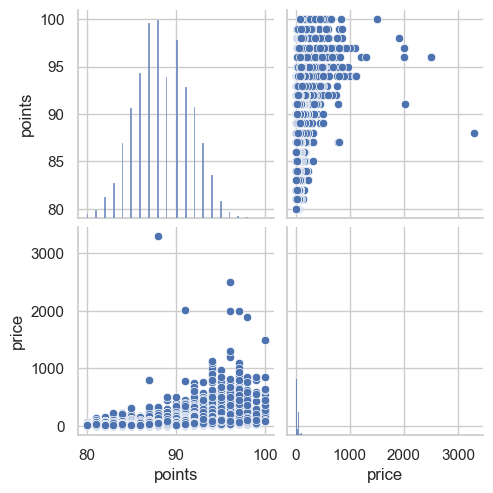

In [48]:
sns.pairplot(df[['points', 'price']].dropna())  
plt.show()


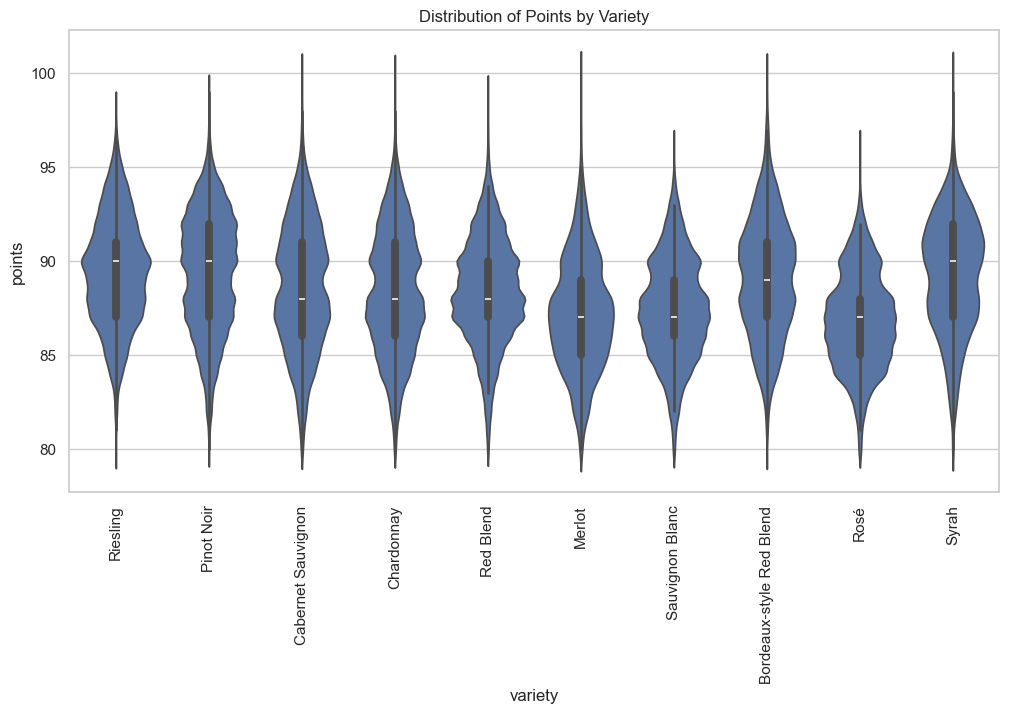

In [49]:
plt.figure(figsize=(12, 6))
top_varieties = df['variety'].value_counts().nlargest(10).index  
sns.violinplot(x='variety', y='points', data=df[df['variety'].isin(top_varieties)])
plt.title('Distribution of Points by Variety')
plt.xticks(rotation=90)
plt.show()
